# Box Office Revenue Prediction Using Linear Regression in ML

This code loops through each genre in the genres list, and for each genre:

- Extracts the corresponding column from the features array.
- Assigns it as a column in the DataFrame df.
Consider the example code provided below,

```
import pandas as pd
import numpy as np

# Example data
genres = ['Pop', 'Rock', 'Jazz']
features = np.array([[1, 2, 3],
                     [4, 5, 6]])

# Create an empty DataFrame
df = pd.DataFrame()

# Populate the DataFrame
for i, name in enumerate(genres):
    df[name] = features[:, i]

print(df)
```

## Data Cleaning and Preprocessing

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv('boxoffice.csv')
#df = pd.read_csv('boxoffice.csv', encoding='latin-1')
df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,1274885664,Warner Bros.,163620146,253,174687337,R,Animation,16
1,Titanic,169411543,1132871091,Disney,85549990,122,103948486,G,Action,103
2,Jurassic Park,107836098,583329845,Sony,55681429,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,1225323391,Disney,109775324,3868,46431596,G,Horror,85
4,The Lion King,142791649,604140729,Warner Bros.,59476800,2934,203513696,R,Comedy,158


In [123]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   world_revenue     2694 non-null   int64 
 3   distributor       2694 non-null   object
 4   opening_revenue   2694 non-null   int64 
 5   opening_theaters  2694 non-null   int64 
 6   budget            2694 non-null   int64 
 7   MPAA              2694 non-null   object
 8   genres            2694 non-null   object
 9   release_days      2694 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 210.6+ KB
(2694, 10)


In [124]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2694.0,1.508539e+08,8.579997e+07,827765.0,7.673272e+07,152572473.5,2.247314e+08,2.998107e+08
world_revenue,2694.0,7.719177e+08,4.284414e+08,3261301.0,3.991135e+08,766555142.5,1.143920e+09,1.499310e+09
opening_revenue,2694.0,9.971321e+07,5.721762e+07,138569.0,5.033848e+07,99814175.0,1.489805e+08,1.999336e+08
opening_theaters,2694.0,2.263039e+03,1.298559e+03,10.0,1.161000e+03,2271.5,3.392250e+03,4.499000e+03
budget,2694.0,1.537996e+08,8.557624e+07,5197977.0,7.861876e+07,156256716.0,2.274832e+08,2.998597e+08
release_days,2694.0,9.089755e+01,5.089404e+01,1.0,4.700000e+01,91.0,1.350000e+02,1.790000e+02


#### The features world_revenue, opening_revenue and budget will not be used.

In [125]:
df = df.drop(['world_revenue', 'opening_revenue', 'budget'], axis=1)

In [126]:
df.isnull().sum()

title               0
domestic_revenue    0
distributor         0
opening_theaters    0
MPAA                0
genres              0
release_days        0
dtype: int64

#### There are no null values in the columns. However, if they were to be present, they would be replaced by means using the code snippet below.

In [127]:
for col in ['MPAA', 'genres']:
    df[col] = df[col].fillna(df[col].mode()[0])

df.dropna(inplace=True)

df.isnull().sum().sum()

0

In [128]:
temp = df.filter(['domestic_revenue', 'opening_theaters', 'release_days'])
temp.head()

,domestic_revenue,opening_theaters,release_days
0,6026491,253,16
1,169411543,122,103
2,107836098,3826,89
3,51433697,3868,85
4,142791649,2934,158


#### I could not understand what the code below was meant to do. However, it seems to affect the **mean** of the domestic revenue as seen below. It brings the means to reasonable **1e+7 values** instead of **1e+8 values**.

#### I suspect that changing the data type from int to float has an impact on how the data is processed.

In [129]:
df['domestic_revenue'] = df['domestic_revenue'].astype(str).str[1:]

for col in ['domestic_revenue', 'opening_theaters', 'release_days']:
    df[col] = df[col].astype(str).str.replace(',', '') 

    # Selecting rows with no null values 
    # in the columns on which we are iterating. 
    temp = (~df[col].isnull()) 
    df[temp][col] = df[temp][col].convert_dtypes(float) 

    df[col] = pd.to_numeric(df[col], errors='coerce')

In [130]:
temp = df.filter(['domestic_revenue', 'opening_theaters', 'release_days'])
temp.head()

,domestic_revenue,opening_theaters,release_days
0,26491,253,16
1,69411543,122,103
2,7836098,3826,89
3,1433697,3868,85
4,42791649,2934,158


## Exploratory Data Analysis

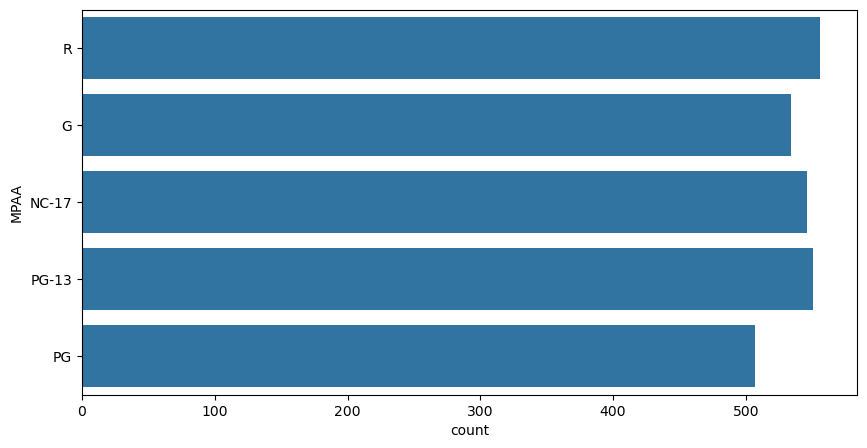

In [131]:
plt.figure(figsize=(10, 5))
sb.countplot(df['MPAA'])
plt.show()

In [132]:
df.groupby('MPAA')['domestic_revenue'].mean()

MPAA
G        3.426099e+07
NC-17    3.452006e+07
PG       3.697347e+07
PG-13    3.510989e+07
R        3.670206e+07
Name: domestic_revenue, dtype: float64

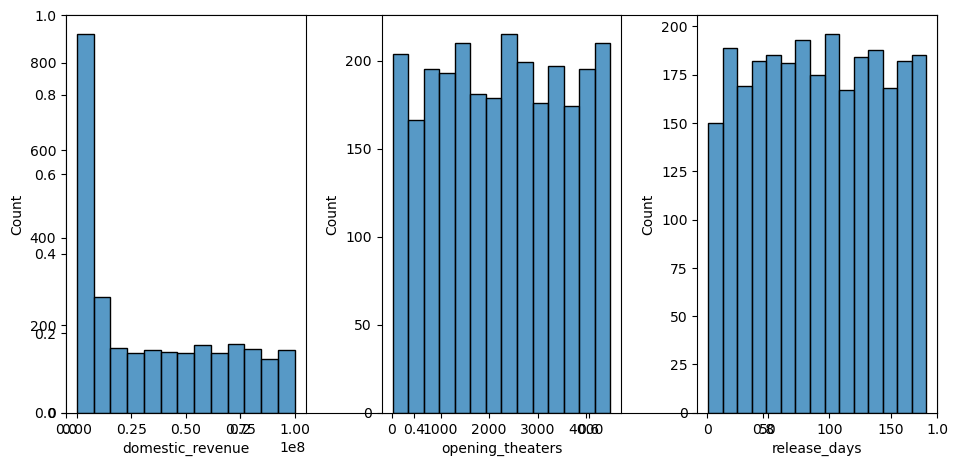

In [133]:
# adjust figure size ratios
plt.subplots(figsize=(10, 5))

features = ['domestic_revenue', 'opening_theaters', 'release_days']
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sb.histplot(df[col])
plt.tight_layout()
plt.show()

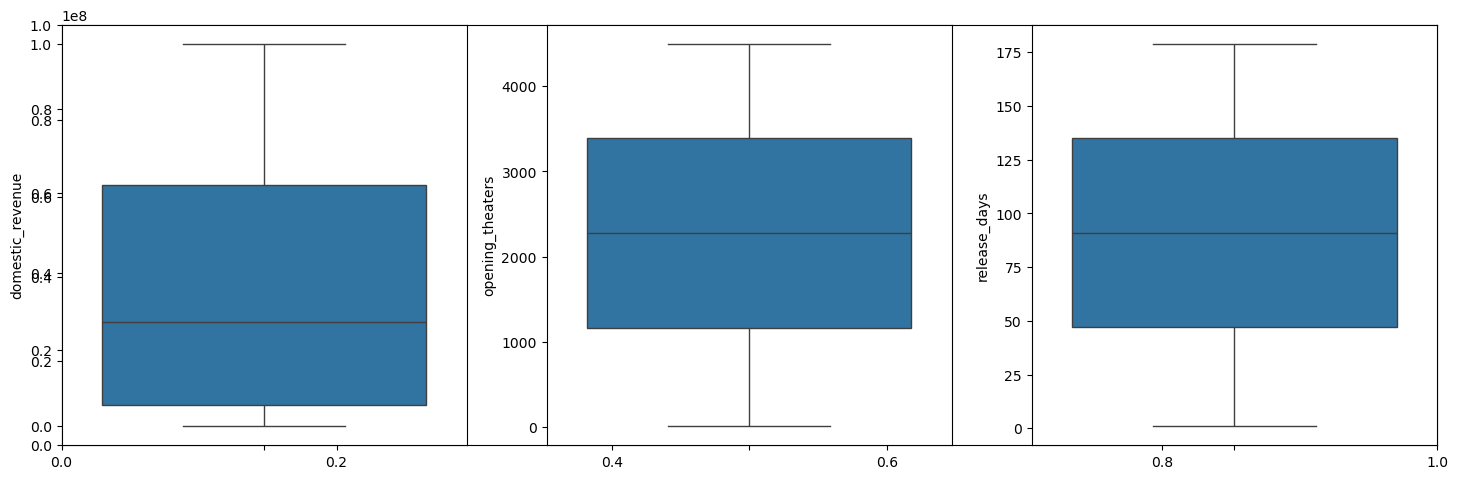

In [134]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

There are no outliers in the above features.
A logarithm function is appled on the features to achieve a distribution closer to normal.

In [135]:
for col in features:
  df[col] = df[col].apply(lambda x: np.log10(x))

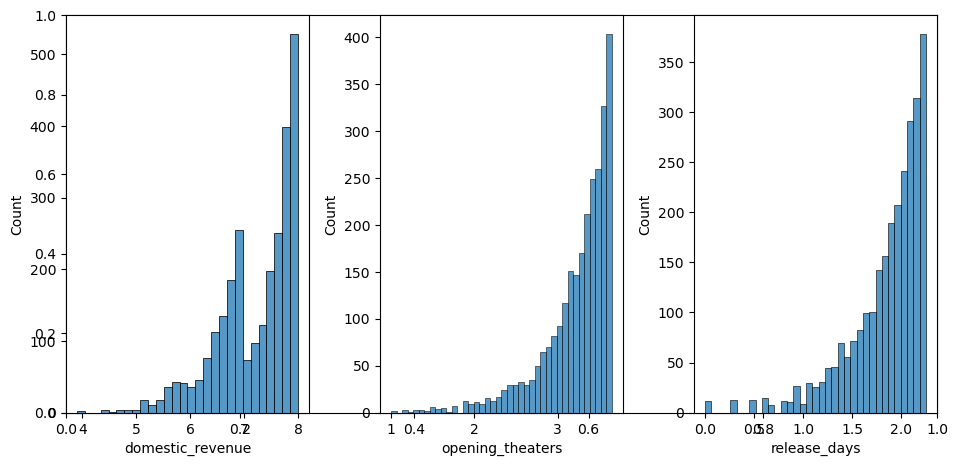

In [136]:
plt.subplots(figsize=(10, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sb.histplot(df[col])
plt.tight_layout()
plt.show()

## Feature Engineering

#### The goal of the regression will be to determine the movie budget based on the genre and the aforementioned features.

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
vectorizer.fit(df['genres']) 
features = vectorizer.transform(df['genres']).toarray() 

genres = vectorizer.get_feature_names_out() 
for i, name in enumerate(genres): 
    df[name] = features[:, i] 

df.drop('genres', axis=1, inplace=True)

As can be seen below, the genres are encoded 

In [138]:
df.head()

,title,domestic_revenue,distributor,opening_theaters,MPAA,release_days,action,animation,comedy,drama,horror,thriller
0,The Avengers,4.423098,Warner Bros.,2.403121,R,1.204120,0,1,0,0,0,0
1,Titanic,7.841432,Disney,2.086360,G,2.012837,1,0,0,0,0,0
2,Jurassic Park,6.894100,Sony,3.582745,NC-17,1.949390,0,0,0,0,1,0
3,Avatar,6.156457,Disney,3.587486,G,1.929419,0,0,0,0,1,0
4,The Lion King,7.631359,Warner Bros.,3.467460,R,2.198657,0,0,1,0,0,0


#### But there will be certain genres that are not that frequent which will lead to increases in the complexity of the model unnecessarily. So, genres which are very rare will be removed.

In [141]:
df.shape

(2694, 12)

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
for col in ['distributor', 'MPAA']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [144]:
df.head()

,title,domestic_revenue,distributor,opening_theaters,MPAA,release_days,action,animation,comedy,drama,horror,thriller
0,The Avengers,4.423098,4,2.403121,4,1.204120,0,1,0,0,0,0
1,Titanic,7.841432,0,2.086360,0,2.012837,1,0,0,0,0,0
2,Jurassic Park,6.894100,2,3.582745,1,1.949390,0,0,0,0,1,0
3,Avatar,6.156457,0,3.587486,0,1.929419,0,0,0,0,1,0
4,The Lion King,7.631359,4,3.467460,4,2.198657,0,0,1,0,0,0


#### As all the categorical features have been labeled encoded, it must be checked if there are highly correlated features in the dataset.

#### It seems there is no high correlation between features, hence nothing is to be removed.

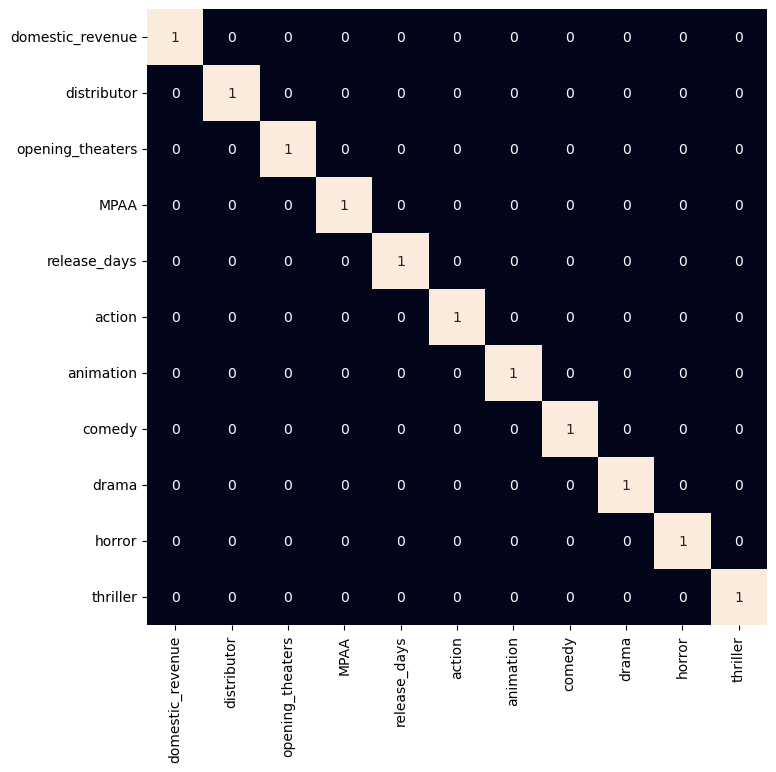

In [143]:
plt.figure(figsize=(8, 8))
sb.heatmap(df.select_dtypes(include=np.number).corr() > 0.8, 
            annot=True, 
            cbar=False) 
plt.show()

In [145]:
features = df.drop(['title', 'domestic_revenue'], axis=1) 
target = df['domestic_revenue'].values 

X_train, X_val, Y_train, Y_val = train_test_split(features, target, 
                                    test_size=0.1, 
                                    random_state=22) 
X_train.shape, X_val.shape 

((2424, 10), (270, 10))

## Model Selection and Training

In [146]:
from sklearn import metrics
from xgboost import XGBRegressor
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [147]:
from sklearn.metrics import mean_absolute_error as mae
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [148]:
train_preds = model.predict(X_train) 
print('Training Error : ', mae(Y_train, train_preds)) 

val_preds = model.predict(X_val) 
print('Validation Error : ', mae(Y_val, val_preds)) 

Training Error :  0.2104541861999253
Validation Error :  0.6358190127903746
